In [ ]:
import torch
from matplotlib import pyplot as plt
from matplotlib import colors

In [ ]:
B = 16
SEQ_LEN = 4
NUM_SLOTS = 4
SLOT_DIM = 64

input_seq = torch.rand(B, SEQ_LEN * NUM_SLOTS, SLOT_DIM)

In [ ]:
def get_standard_mask_pattern(seq_len, num_slots):
    """ Obtaining a binary maskign pattern """
    num_tokens = seq_len * num_slots
    mask_pattern = torch.zeros((num_tokens, num_tokens))
    for i in range(seq_len):
        mask_pattern[num_slots*i:, num_slots*i:num_slots*(i + 1)] = 1.
    mask = mask_pattern.clone().float().masked_fill(mask_pattern == 0, float('-inf')).masked_fill(mask_pattern == 1, float(0.0))
    return mask, mask_pattern



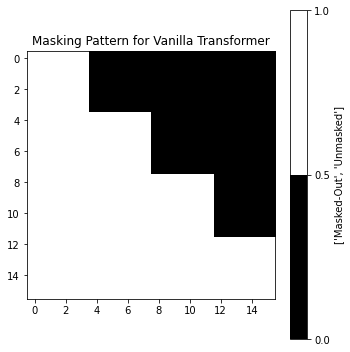

In [ ]:
mask, mask_pattern = get_standard_mask_pattern(seq_len=SEQ_LEN, num_slots=NUM_SLOTS)

cmap = colors.ListedColormap(['black', 'white'])
bounds=[0, .5, 1]
norm = colors.BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(5, 5))
plt.title("Masking Pattern for Vanilla Transformer")
plt.imshow(mask_pattern, vmin=0, vmax=1, cmap=cmap, norm=norm)
plt.colorbar(label=["Masked-Out", "Unmasked"])
plt.tight_layout()
plt.show()



In [ ]:
def get_object_mask_pattern(seq_len, num_slots):
    diagonal = [torch.ones((num_slots,num_slots)) for _ in range(seq_len)]
    mask_pattern = torch.block_diag(*diagonal)
    mask = mask_pattern.clone().float().masked_fill(mask_pattern == 0, float('-inf')).masked_fill(mask_pattern == 1, float(0.0))
    return mask, mask_pattern

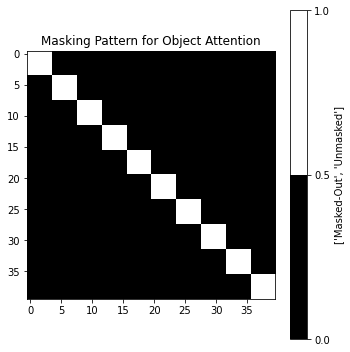

In [ ]:
mask, mask_pattern = get_object_mask_pattern(seq_len=SEQ_LEN, num_slots=NUM_SLOTS)

cmap = colors.ListedColormap(['black', 'white'])
bounds=[0, .5, 1]
norm = colors.BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(5, 5))
plt.title("Masking Pattern for Object Attention")
plt.imshow(mask_pattern, vmin=0, vmax=1, cmap=cmap, norm=norm)
plt.colorbar(label=["Masked-Out", "Unmasked"])
plt.tight_layout()
plt.show()



In [ ]:
def get_time_mask_pattern(seq_len, num_slots):
    num_tokens = seq_len * num_slots
    mask_pattern = torch.zeros((num_tokens, num_tokens))
    for diag in range(0,num_tokens,num_slots):
      mask_pattern+=torch.diag(torch.ones(num_tokens), diagonal=diag)[:num_tokens,:num_tokens]
    mask = mask_pattern.clone().float().masked_fill(mask_pattern == 0, float('-inf')).masked_fill(mask_pattern == 1, float(0.0))
    return mask, mask_pattern

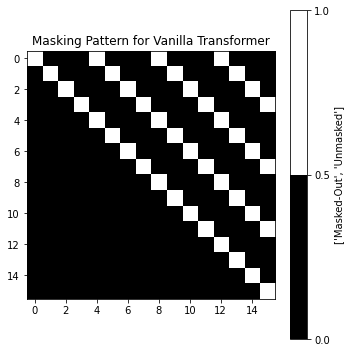

In [ ]:
mask, mask_pattern = get_time_mask_pattern(seq_len=SEQ_LEN, num_slots=NUM_SLOTS)

cmap = colors.ListedColormap(['black', 'white'])
bounds=[0, .5, 1]
norm = colors.BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(5, 5))
plt.title("Masking Pattern for Vanilla Transformer")
plt.imshow(mask_pattern, vmin=0, vmax=1, cmap=cmap, norm=norm)
plt.colorbar(label=["Masked-Out", "Unmasked"])
plt.tight_layout()
plt.show()

